# 简介

* 解决的是二分类问题
* 类别分别用0和1表示

## 假设函数

sigmoid函数：  

$$g(z)=\frac{1}{1+e^{-z}}$$

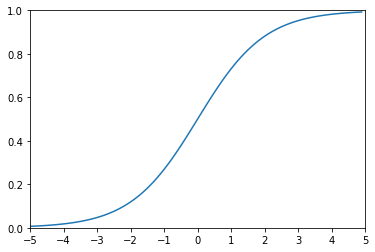

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5,5,0.1)
plt.figure(figsize=(6,4))
plt.plot(x,1/(1+(np.e)**(-x)))
plt.axis([-5,5,0,1])
plt.xticks(ticks=list(range(-5,6)))
plt.show()

其中：  

$$z=\theta_0x_0+\theta_1x_1+...+\theta_nx_n$$

假设函数：  

$$\hat y=h_\theta(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$$

## 损失函数

$$L(\hat y,y)=-ylog\hat y-(1-y)log(1-\hat y)$$

$y=1$ 时，$L(\hat y,y)=-ylog\hat y$，要使损失最小，则 $\hat y$ 越大越好，而 $\hat y$ 取值在 $[0,1]$ 之间，因此 $\hat y$ 要尽量接近 1  
$y=0$ 时，$L(\hat y,y)=-log(1-\hat y)$，要使损失最小，则 $1-\hat y$ 越大越好，即 $\hat y$ 越小越好，因此 $\hat y$ 要尽量接近 0  

## 成本函数（代价函数）

$$
\begin{align}
J(\theta)&=\frac{1}{m}\sum_{i=1}^m L({\hat y}^{(i)},y^{(i)}) \\\
&=\frac{1}{m}\sum_{i=1}^m [-y^{(i)}log{\hat y}^{(i)}-(1-y^{(i)})log(1-{\hat y}^{(i)})] \\\
&=\frac{1}{m}\sum_{i=1}^m [-y^{(i)}log\frac{1}{1+e^{-\theta^Tx^{(i)}}}-(1-y^{(i)})log(1-\frac{1}{1+e^{-\theta^Tx^{(i)}}})]
\end{align}
$$

# 逻辑回归求解

通过梯度下降法对代价函数求偏导（以下 $log$ 可看作 $ln$）：  

$$
\begin{align}
\frac{\partial}{\partial\theta_j}J(\theta)&=\frac{\partial}{\partial\theta_j}\frac{1}{m}\sum_{i=1}^m [-y^{(i)}log\frac{1}{1+e^{-\theta^Tx^{(i)}}}-(1-y^{(i)})log(1-\frac{1}{1+e^{-\theta^Tx^{(i)}}})] \\\
&=\frac{\partial}{\partial\theta_j}\frac{1}{m}\sum_{i=1}^m [y^{(i)}log(1+e^{-\theta^Tx^{(i)}})+(1-y^{(i)})log(1+e^{\theta^Tx^{(i)}})] \\\
&=\frac{1}{m}\sum_{i=1}^m [y^{(i)}\frac{-x_j^{(i)}e^{-\theta^Tx^{(i)}}}{1+e^{-\theta^Tx^{(i)}}}+(1-y^{(i)})\frac{x_j^{(i)}e^{\theta^Tx^{(i)}}}{1+e^{\theta^Tx^{(i)}}}] \\\
&=\frac{1}{m}\sum_{i=1}^m [y^{(i)}\frac{-x_j^{(i)}}{1+e^{\theta^Tx^{(i)}}}+(1-y^{(i)})\frac{x_j^{(i)}e^{\theta^Tx^{(i)}}}{1+e^{\theta^Tx^{(i)}}}] \\\
&=\frac{1}{m}\sum_{i=1}^m [\frac{-x_j^{(i)}y^{(i)}+x_j^{(i)}e^{\theta^Tx^{(i)}}-y^{(i)}x_j^{(i)}e^{\theta^Tx^{(i)}}}{1+e^{\theta^Tx^{(i)}}}] \\\
&=\frac{1}{m}\sum_{i=1}^m [\frac{-y^{(i)}(1+e^{\theta^Tx^{(i)}})+e^{\theta^Tx^{(i)}}}{1+e^{\theta^Tx^{(i)}}}x_j^{(i)}] \\\
&=\frac{1}{m}\sum_{i=1}^m [(-y^{(i)}+\frac{e^{\theta^Tx^{(i)}}}{1+e^{\theta^Tx^{(i)}}})x_j^{(i)}] \\\
&=\frac{1}{m}\sum_{i=1}^m [(-y^{(i)}+\frac{1}{1+e^{-\theta^Tx^{(i)}}})x_j^{(i)}] \\\
&=\frac{1}{m}\sum_{i=1}^m [(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]
\end{align}
$$

迭代公式：

$$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m [(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]$$

其中：

$$h_\theta(x)=\frac{1}{1+e^{-\theta^Tx}}$$

# 逻辑回归代码实现

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import accuracy_score

**1. 加载数据的函数**

In [3]:
def loaddata(path):
    data = np.loadtxt(path,delimiter=',')
    n = data.shape[1] - 1     # 特征数
    X = data[:,0:n]
    y = data[:,-1].reshape(-1,1)
    return X,y

**2.画散点图**

In [4]:
def plot(X,y):
    pos = np.where(y[:,0]==1)
    neg = np.where(y[:,0]==0)
    plt.scatter(X[pos,0],X[pos,1],marker='x')
    plt.scatter(X[neg,0],X[neg,1],marker='o')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

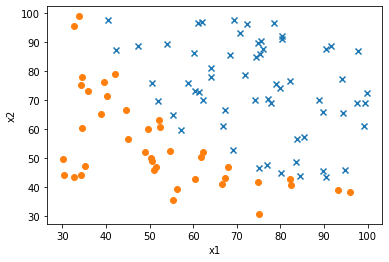

In [5]:
X,y = loaddata("data/data3.txt")
plot(X,y)

**3.实现sigmoid函数**

$$g(z)=\frac{1}{1+e^{-z}}$$

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
sigmoid(3)

0.9525741268224334

In [8]:
sigmoid(np.array([3,4,-8]))

array([9.52574127e-01, 9.82013790e-01, 3.35350130e-04])

**4.实现假设函数**

$$\hat y=h_\theta(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$$

In [9]:
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

**5.代价函数**

$$
\begin{align}
J(\theta)&=\frac{1}{m}\sum_{i=1}^m L({\hat y}^{(i)},y^{(i)}) \\\
&=\frac{1}{m}\sum_{i=1}^m [-y^{(i)}log{\hat y}^{(i)}-(1-y^{(i)})log(1-{\hat y}^{(i)})] 
\end{align}
$$

In [10]:
def computeCost(X,y,theta):
    m = X.shape[0]
    y_hat = hypothesis(X,theta)
    c = -y*np.log(y_hat)-(1-y)*np.log(1-y_hat)
    return np.sum(c) / m

**6.梯度下降法求解**

$$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m [(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]$$

In [11]:
def gradientDescent(X,y,theta,iteration,alpha):
    X = np.insert(X,0,values=1,axis=1)
    m,n = X.shape
    
    for i in range(iteration):
        for j in range(n):
            theta[j] = theta[j] - alpha/m*np.sum((hypothesis(X,theta)-y)*X[:,j].reshape(-1,1))
        if i%10000 == 0:
            print("第{0}次迭代，当前损失为：{1}，theta={2}".format(i,computeCost(X,y,theta),theta))
    
    return theta

**7.预测函数**

In [12]:
n = X.shape[1]
theta = np.zeros(n+1).reshape(-1,1)
iterations = 250000
alpha = 0.008

In [13]:
theta = gradientDescent(X,y,theta,iterations,alpha)
theta

第0次迭代，当前损失为：3.4898192542187316，theta=[[ 0.0008    ]
 [ 0.0959687 ]
 [-0.17080118]]
第10000次迭代，当前损失为：3.633794596164655，theta=[[-6.0072283 ]
 [ 0.050662  ]
 [ 0.22802046]]
第20000次迭代，当前损失为：1.6421156695148182，theta=[[-11.04817588]
 [ -0.09665535]
 [  0.30417947]]
第30000次迭代，当前损失为：1.4051177473049952，theta=[[-14.64580889]
 [  0.33905718]
 [ -0.09182453]]
第40000次迭代，当前损失为：1.1284288395235624，theta=[[-17.65627776]
 [  0.02789143]
 [  0.31864018]]
第50000次迭代，当前损失为：0.9221874390429973，theta=[[-1.96095214e+01]
 [ 2.78099355e-01]
 [ 7.52595875e-03]]
第60000次迭代，当前损失为：0.6668312927145998，theta=[[-20.98450998]
 [  0.08872738]
 [  0.29042701]]
第70000次迭代，当前损失为：0.5397692839824905，theta=[[-22.0116349 ]
 [  0.17110523]
 [  0.23684449]]
第80000次迭代，当前损失为：0.47798593027345926，theta=[[-22.85406545]
 [  0.10150192]
 [  0.26789884]]
第90000次迭代，当前损失为：0.3857789652295521，theta=[[-23.52871631]
 [  0.18088181]
 [  0.23778719]]
第100000次迭代，当前损失为：0.33992108594315495，theta=[[-24.06932143]
 [  0.1833052 ]
 [  0.23863557]]
第110000次迭

array([[-25.7214775 ],
       [  0.21158791],
       [  0.19917776]])

In [14]:
def predict(X):
    X = np.insert(X,0,values=1,axis=1)
    h = hypothesis(X,theta)
    #根据概率值决定最终的分类,>=0.5为1类，<0.5为0类
    h[h>=0.5] = 1
    h[h<0.5] = 0
    
    return h

In [15]:
p = predict(X)
p

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [16]:
accuracy_score(p,y)

0.9

**8.画决策边界**

In [17]:
def plotDescisionBoundary(X,y,theta):
    cm_dark = mpl.colors.ListedColormap(['g','r'])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.scatter(X[:,0],X[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)
    
    #化分类决策面 theta0+theta1*x1+theta2*x2 = 0
    x1 = np.arange(min(X[:,0]),max(X[:,0]),0.1)
    x2 = -(theta[0]+theta[1]*x1)/theta[2]
    plt.plot(x1,x2)
    plt.show()

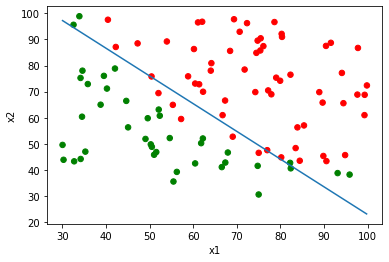

In [18]:
plotDescisionBoundary(X,y,theta)

# 逻辑回归的正则化

加入2范式来解决过拟合问题，$2m$ 是为了消去求导后的 $2$：  

$$J(\theta)=\frac{1}{m}\sum_{i=1}^m [-y^{(i)}log\frac{1}{1+e^{-\theta^Tx^{(i)}}}-(1-y^{(i)})log(1-\frac{1}{1+e^{-\theta^Tx^{(i)}}})]+\frac{\lambda}{2m}{\left \| \theta \right \|}_2^2$$

迭代公式：  

$$\theta_j:=\theta_j-\frac{\alpha}{m}(\sum_{i=1}^m [(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]+\lambda\theta_j)$$

**代价函数**

In [19]:
def computeCost(X,y,theta,lamda):
    m = X.shape[0]
    y_hat = hypothesis(X,theta)
    c = -y*np.log(y_hat)-(1-y)*np.log(1-y_hat)
    return np.sum(c) / m + lamda / (2*m) * np.sum(np.power(theta,2))

**梯度下降法求解**

In [22]:
def gradientDescent(X,y,theta,iteration,alpha,lamda):
    X = np.insert(X,0,values=1,axis=1)
    m,n = X.shape
    
    for i in range(iteration):
        for j in range(n):
            theta[j] = theta[j] - alpha/m*(np.sum((hypothesis(X,theta)-y)*X[:,j].reshape(-1,1))+lamda*theta[j])
        if i%10000 == 0:
            print("第{0}次迭代，当前损失为：{1}，theta={2}".format(i,computeCost(X,y,theta,lamda),theta))
    
    return theta

In [23]:
n = X.shape[1]
theta = np.zeros(n+1).reshape(-1,1)
iterations = 250000
alpha = 0.008
lamda = 0.01
theta = gradientDescent(X,y,theta,iterations,alpha,lamda)
theta

第0次迭代，当前损失为：3.4898211734024334，theta=[[ 0.0008    ]
 [ 0.0959687 ]
 [-0.17080118]]
第10000次迭代，当前损失为：1.742800591795805，theta=[[-5.97396642]
 [ 0.03494948]
 [ 0.00734691]]
第20000次迭代，当前损失为：1.6350296421727863，theta=[[-10.99045142]
 [ -0.0957601 ]
 [  0.25509445]]
第30000次迭代，当前损失为：1.2755309233391，theta=[[-14.47603256]
 [  0.24101975]
 [  0.08375873]]
第40000次迭代，当前损失为：0.9171076789517963，theta=[[-17.43209425]
 [  0.26455879]
 [  0.08760486]]
第50000次迭代，当前损失为：0.7870734058134988，theta=[[-19.33019256]
 [  0.1848856 ]
 [  0.1962559 ]]
第60000次迭代，当前损失为：0.7678570762112327，theta=[[-20.65128186]
 [  0.3170618 ]
 [  0.04350708]]
第70000次迭代，当前损失为：0.5480573979988327，theta=[[-21.59058274]
 [  0.09375762]
 [  0.23119576]]
第80000次迭代，当前损失为：0.5252331725834901，theta=[[-22.35637706]
 [  0.11682465]
 [  0.27621063]]
第90000次迭代，当前损失为：0.5338996369673558，theta=[[-22.96485411]
 [  0.28047518]
 [  0.08323508]]
第100000次迭代，当前损失为：0.4656598627829162，theta=[[-23.45384231]
 [  0.11660825]
 [  0.27483063]]
第110000次迭代，当前损失为：0.3861

array([[-25.11944059],
       [  0.21193097],
       [  0.17255222]])

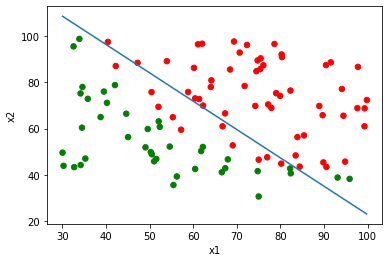

In [24]:
plotDescisionBoundary(X,y,theta)

In [25]:
p = predict(X)
accuracy_score(p,y)

0.88

# 逻辑回归实现多分类

**1.One over Rest(OvR)**  

$\max h_\theta^k(x)$

每次将一个类的样本作为正例，所有其他类的样本作为反例来训练，$K$ 个类别将有 $K$ 个分类器。在预测时，若仅有一个分类器预测为正类，其他分类器都预测为反类，则那一个正类为最终分类结果；若有多个分类器预测为正类，则选择概率最大的类别作为分类结果。  

缺点：数据可能不均匀，导致训练集有偏，对结果会造成影响

**2.One over One(OvO)**  

所有类别两两配对，$K$ 个类别将有 $k(k-1)/2$ 个分类器，把被预测得最多的类别作为最终分类结果。  

缺点：训练开销大  

优点：相对OvR准确率高

**3.Multi over Multi(MvM)**  

编码：对 $N$ 个类别做 $M$ 次划分，每次划分将一部分类别划为正类，其余负类（$M$ 个分类器）。  

解码：$M$ 个分类器预测标记组成一个编码，将此预测编码与各自类别的编码进行比较，返回其中距离最小的类。  

OvO 是 MvM 的一个特例。  

# 使用Sklearn实现逻辑回归

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
from sklearn.metrics import accuracy_score

常用参数含义：
  - C：正则化参数 $\lambda$ 的倒数，C越大，惩罚越小，易过拟合，泛化能力差。C越小，惩罚越大，不易过拟合，泛化能力好。
  - multi_class:   
      - 默认值auto，表示会根据数据的分类情况和其他参数来确定模型要处理的分类问题的类型；
      - ovr，表示分类问题是二分类，或让模型使用"一对多"的形式来处理多分类问题；
      - multinomial，表示处理多分类问题MvM，这种输入在参数solver是'liblinear'时不可用。  
  - max_iter: 迭代次数
  - solver：求解器
      - liblinear：默认值，坐标下降法，二分类专用
      - lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵（海森矩阵）来迭代优化损失函数  
      - newton-cg：牛顿法的一种，利用损失函数二阶导数矩阵（海森矩阵）来迭代优化损失函数
      - sag：随机平均梯度下降，每次迭代仅用一部分样本计算梯度
      - saga：随机平均梯度下降的进化，稀疏多项逻辑回归的首选

In [27]:
model = linear_model.LogisticRegression(C=50,max_iter=2000)
model.fit(X,y)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=50, max_iter=2000)

In [28]:
print("系数：",model.coef_)
print("截距项：",model.intercept_)
y_hat = model.predict(X)
print("准确度：",accuracy_score(y,y_hat))

系数： [[0.20621451 0.20145397]]
截距项： [-25.15918048]
准确度： 0.89


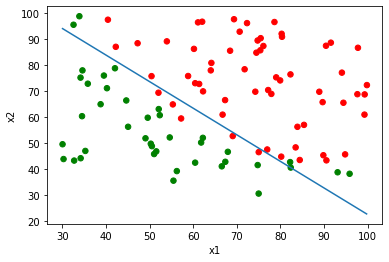

In [29]:
theta = np.append(model.intercept_,model.coef_)
plotDescisionBoundary(X,y,theta)

# 案例：鸢尾花分类

## 获取数据

特征：  
sepal_length：花萼长度  
sepal_width：花萼宽度  
petal_length：花瓣长度  
petal_width：花瓣宽度  

标签：  
0：setosa，山鸢尾  
1：versicolor，变色鸢尾花  
2：virginica，维吉尼亚鸢尾花

In [30]:
from sklearn.datasets import load_iris

In [33]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [34]:
iris    # 前50个是0，中间50个是1，后50个是2

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [35]:
X = iris.data
y = iris.target

## 任取两个特征画图

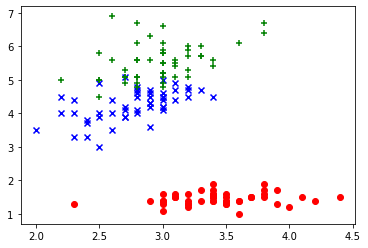

In [36]:
feature1 = 1    # feature1和feature2取值范围[0,1,2,3]
feature2 = 2

plt.scatter(X[0:50,feature1],X[0:50,feature2],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,feature1],X[50:100,feature2],color='blue',marker='x',label='versicolor')
plt.scatter(X[100:,feature1],X[100:,feature2],color='green',marker='+',label='virginica')
plt.show()

## 训练模型

In [44]:
model = linear_model.LogisticRegression(C=100,multi_class='multinomial')
model.fit(X,y)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, multi_class='multinomial')

In [45]:
# 一共有3个类别，因此会产生3个分类器
print("系数：",model.coef_)
print("截距项：",model.intercept_)
y_hat = model.predict(X)
print("准确度：",accuracy_score(y,y_hat))

系数： [[-0.367145    3.3699799  -6.1440138  -3.9265341 ]
 [ 1.29751634  0.46886566 -0.55958886 -4.20752165]
 [-0.93037134 -3.83884556  6.70360266  8.13405576]]
截距项： [ 19.47461719   5.3394384  -24.81405558]
准确度： 0.9866666666666667


## 可视化分类结果

为了可视化分类结果，我们取2个特征进行训练。

In [46]:
feature1 = 2    # feature1和feature2取值范围[0,1,2,3]
feature2 = 3

X_2 = X[:,[feature1,feature2]]
model2 = linear_model.LogisticRegression(C=100,multi_class='multinomial')
model2.fit(X_2,y)

LogisticRegression(C=100, multi_class='multinomial')

In [52]:
#meshgrid函数生成两个网格矩阵
interval = 0.02
x_min,x_max = min(X[:,feature1]) - 0.5, max(X[:,feature1]) + 0.5
y_min,y_max = min(X[:,feature2]) - 0.5, max(X[:,feature2]) + 0.5
xx, yy = np.meshgrid(np.arange(x_min,x_max,interval),np.arange(y_min,y_max,interval))
print(xx)
print(yy)

[[0.5  0.52 0.54 ... 7.34 7.36 7.38]
 [0.5  0.52 0.54 ... 7.34 7.36 7.38]
 [0.5  0.52 0.54 ... 7.34 7.36 7.38]
 ...
 [0.5  0.52 0.54 ... 7.34 7.36 7.38]
 [0.5  0.52 0.54 ... 7.34 7.36 7.38]
 [0.5  0.52 0.54 ... 7.34 7.36 7.38]]
[[-0.4  -0.4  -0.4  ... -0.4  -0.4  -0.4 ]
 [-0.38 -0.38 -0.38 ... -0.38 -0.38 -0.38]
 [-0.36 -0.36 -0.36 ... -0.36 -0.36 -0.36]
 ...
 [ 2.94  2.94  2.94 ...  2.94  2.94  2.94]
 [ 2.96  2.96  2.96 ...  2.96  2.96  2.96]
 [ 2.98  2.98  2.98 ...  2.98  2.98  2.98]]


In [55]:
# 按列叠加两个矩阵
xy = np.c_[xx.ravel(),yy.ravel()]
xy

array([[ 0.5 , -0.4 ],
       [ 0.52, -0.4 ],
       [ 0.54, -0.4 ],
       ...,
       [ 7.34,  2.98],
       [ 7.36,  2.98],
       [ 7.38,  2.98]])

In [57]:
z = model2.predict(xy).reshape(xx.shape)
z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

C:\Users\gaoyu\AppData\Local\Temp/ipykernel_20440/3289454534.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)


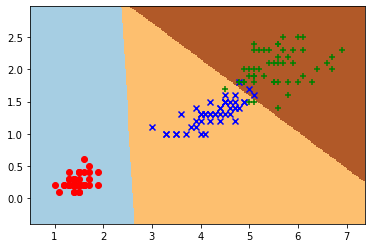

In [58]:
# 将点(xx,yy)和预测结果z一一映射，形成不同的颜色
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)

plt.scatter(X[0:50,feature1],X[0:50,feature2],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,feature1],X[50:100,feature2],color='blue',marker='x',label='versicolor')
plt.scatter(X[100:,feature1],X[100:,feature2],color='green',marker='+',label='virginica')
plt.show()

# 案例：手写数字识别

图片的像素是28*28，黑白图片用二维数组存储  
<img align="left" src="img/数字.png" style="width:250px"><img align="left" src="img/像素.png" style="width:250px">

## 读取数据集

In [59]:
from tool.Read_Minist_Tool import *
import joblib

In [61]:
train_images = load_train_images()
train_labels = load_train_labels()
test_images = load_test_images()
test_labels = load_test_labels()

魔数:2051, 图片数量: 60000张, 图片大小: 28*28
16
>784B 16 784
已解析 10000张
7839232
已解析 20000张
15679232
已解析 30000张
23519232
已解析 40000张
31359232
已解析 50000张
39199232
已解析 60000张
47039232
魔数:2049, 图片数量: 60000张
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2051, 图片数量: 10000张, 图片大小: 28*28
16
>784B 16 784
已解析 10000张
7839232
魔数:2049, 图片数量: 10000张
已解析 10000张


In [62]:
test_images.shape

(10000, 28, 28)

5.0


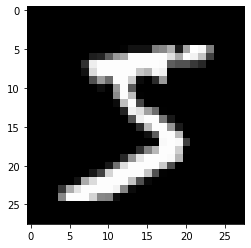

0.0


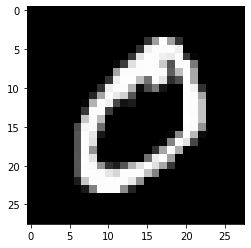

4.0


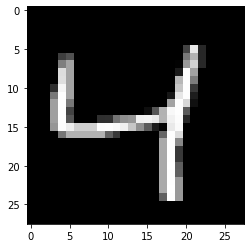

1.0


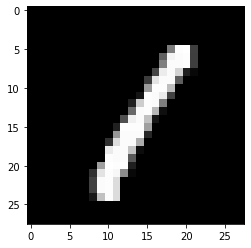

9.0


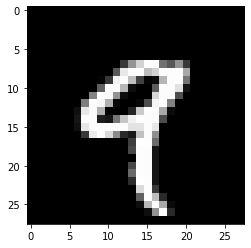

2.0


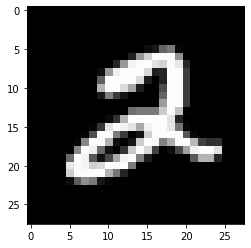

1.0


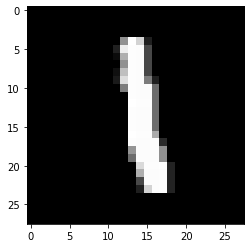

3.0


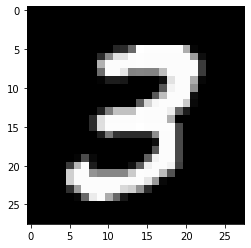

1.0


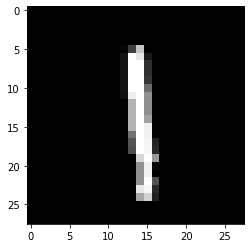

4.0


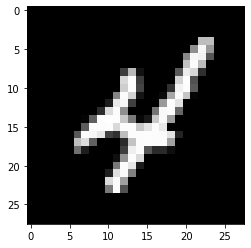

In [64]:
# 查看前十个对象及其对应的标签
for i in range(10):
    print(train_labels[i])
    plt.imshow(train_images[i],cmap='gray')
    plt.show()

## 数据预处理

**构建训练数据特征**

In [67]:
#把X转换成60000行，28*28列的矩阵
X = train_images.reshape(train_images.shape[0],-1)
X.shape

(60000, 784)

**数据归一化**

In [68]:
X = X/255

## 训练模型

In [69]:
model3 = linear_model.LogisticRegression(C=50)
model3.fit(X,train_labels)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=50)

In [70]:
# 0-9共有十个类别，因此会生成十个模型
print(model3.coef_)
print(model3.intercept_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[-1.41537065  1.29660949  0.07179897 -0.59472232  0.2755262   1.97940768
 -0.52777439  1.56939901 -2.14294077 -0.51193321]


## 模型评价

In [73]:
y_train_hat = model3.predict(X)
print("训练集精度：",accuracy_score(y_train_hat,train_labels))
X_test = test_images.reshape(test_images.shape[0],-1)
X_test = X_test / 255
y_test_hat = model3.predict(X_test)
print("测试集精度：",accuracy_score(y_test_hat,test_labels))

训练集精度： 0.9352666666666667
测试集精度： 0.9255
